# Dropout

In [1]:
!pip install mlxtend==0.17.3

     |████████████████████████████████| 1.3 MB 5.0 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [11]:
import os
import datetime
import time
import pytz
import tensorflow as tf
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [3]:
class MyCustomCallback(tf.keras.callbacks.Callback):

  def on_train_begin(self, batch, logs=None):
    self.begins = time.time()
    print('Training: begins at {}'.format(datetime.datetime.now(pytz.timezone('America/Fortaleza')).strftime("%a, %d %b %Y %H:%M:%S")))

  def on_train_end(self, logs=None):
    print('Training: ends at {}'.format(datetime.datetime.now(pytz.timezone('America/Fortaleza')).strftime("%a, %d %b %Y %H:%M:%S")))
    print('Duration: {:.2f} seconds'.format(time.time() - self.begins))

In [5]:
def plot_result(result):
    # plot loss learning curves
    plt.subplot(211)
    plt.title('Cross-Entropy Loss', pad=-40)
    plt.plot(result.history['loss'], label='train')
    plt.plot(result.history['val_loss'], label='test')
    plt.legend()

    # plot accuracy learning curves
    plt.subplot(212)
    plt.title('Accuracy', pad=-40)
    plt.plot(result.history['accuracy'], label='train')
    plt.plot(result.history['val_accuracy'], label='test')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Generate Dataset

In [6]:
# generate 2d classification dataset
x, y = make_moons(n_samples=200, noise=0.3, random_state=1)

# split into train and test sets
n_train = 60
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

## GridSearch for Dropout values

Training: begins at Thu, 29 Jul 2021 09:04:32
Training: ends at Thu, 29 Jul 2021 09:06:17
Duration: 105.52 seconds
Train: 0.983, Test: 0.879


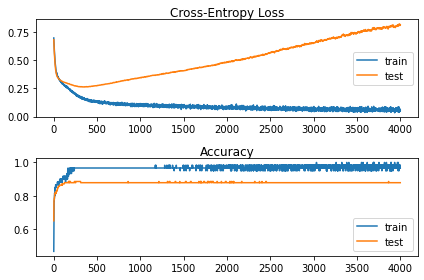

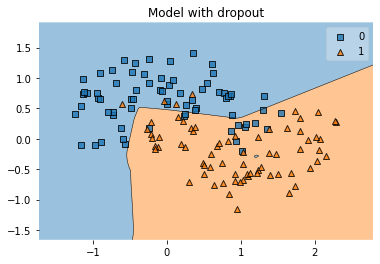

Training: begins at Thu, 29 Jul 2021 09:06:57
Training: ends at Thu, 29 Jul 2021 09:08:44
Duration: 107.01 seconds
Train: 0.967, Test: 0.886


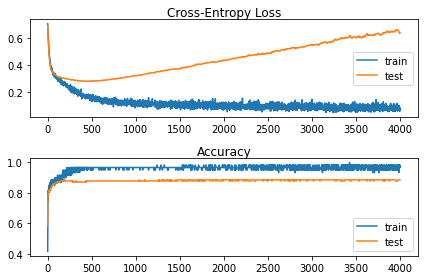

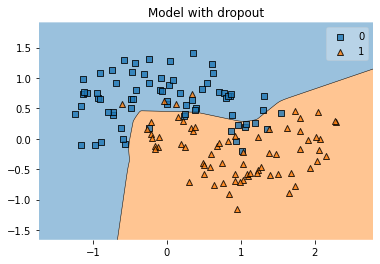

Training: begins at Thu, 29 Jul 2021 09:08:48
Training: ends at Thu, 29 Jul 2021 09:10:32
Duration: 104.72 seconds
Train: 0.967, Test: 0.879


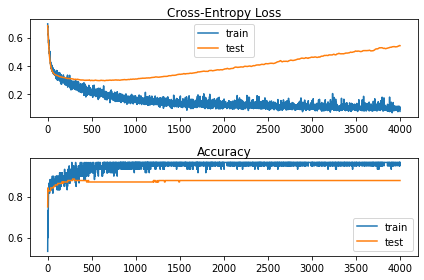

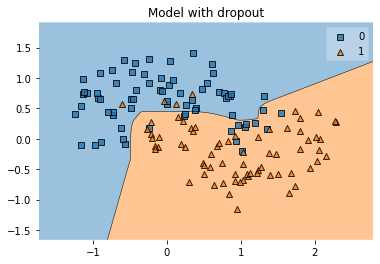

In [14]:
for drop_prob in [0.1, 0.45, 0.8]:
    # define model
    model_dropout = Sequential()
    model_dropout.add(Dense(500, input_dim=2, activation='relu'))
    model_dropout.add(Dropout(drop_prob))
    model_dropout.add(Dense(1, activation='sigmoid'))
    model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit model
    history_dropout = model_dropout.fit(train_x, train_y, 
                        validation_data=(test_x, test_y),
                        epochs=4000, verbose=0,
                        callbacks=[MyCustomCallback()])

    # evaluate the model
    _, train_acc = model_dropout.evaluate(train_x, train_y, verbose=0)
    _, test_acc = model_dropout.evaluate(test_x, test_y, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

    plot_result(history_dropout)
    # Plot decision boundary
    plot_decision_regions(test_x,test_y.squeeze(), clf=model_dropout,zoom_factor=2.0)
    plt.title("Model with dropout")
    plt.show()